In [1]:
import numpy as np
import pandas as pd

#library untuk visualisasi data 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder

from sklearn.naive_bayes import GaussianNB

#untuk mengecek hasil
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

# Input Data

In [2]:
df = pd.read_csv('E:/ANA/DATA MINING/diabetes (1).csv')
df.head

<bound method NDFrame.head of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  diabetes  
0                       0.627   50

# Check Missing Value

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
diabetes                    0
dtype: int64

# Information Of Dataset

In [4]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  diabetes  
0                       0.627   

# Check Imbalance Dataset

In [5]:
df.diabetes.value_counts()

0    500
1    268
Name: diabetes, dtype: int64

# Undersampling

# Train-Test Split

In [6]:
X = df.drop(columns='diabetes')
y = df.diabetes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((691, 8), (77, 8), (691,), (77,))

In [7]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

# Scalling

In [8]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

scaler = StandardScaler()
X_train[columns] = scaler.fit_transform(X_train[columns])
X_test[columns] = scaler.transform(X_test[columns])

# Model

In [9]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

# Evaluate Model

In [10]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1], dtype=int64)

In [11]:
print('accuracy_score:',accuracy_score(y_test, y_pred))

accuracy_score: 0.8051948051948052


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.70      0.73      0.72        26

    accuracy                           0.81        77
   macro avg       0.78      0.79      0.78        77
weighted avg       0.81      0.81      0.81        77



In [13]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[43,  8],
       [ 7, 19]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix Model')

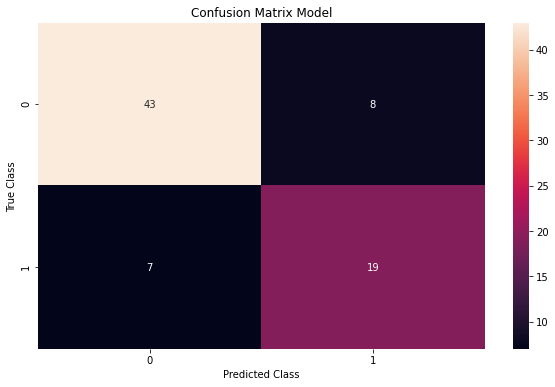

In [14]:
fig = plt.figure(figsize = (10, 6))
sns.heatmap(cm, annot = True, fmt = "d")

# Labeling the X-axis
plt.xlabel("Predicted Class")

# Labeling the Y-axis
plt.ylabel("True Class")

# Give a title to the graph
plt.title("Confusion Matrix Model")